# Part 1 - Pandas and Data Engineering

As in the previous two labs we work with the data provided by the [Open Data portal of the City of Rome](http://dati.comune.roma.it/). We use the dataset related to registered hosting structures, that is, hotels, hostels, B&B, etc., that were active during January 2019. For information on how to import the data from these datasets into a data structure that will support further studies, check out the [ADM Introductory Laboratory](../lab-intro/ADM%20Lab%201%20-%20Intro.ipynb).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot

In [2]:
dataset2019 = pd.read_csv("../data/opendata_suar_gennaio.csv",
                          sep=',', delimiter = None,
                          header='infer', names=None,
                          index_col = None, usecols = None,
                          encoding = "ISO-8859-1")

In [3]:
dataset2019.columns

Index(['Insegna', 'Classificazione', 'Indirizzo', 'Municipio', 'Tipologia',
       'Singole', 'Doppie', 'Triple', 'Quadruple', 'Quintuple', 'Sestuple',
       'Unitaâ Abitative', 'Posti Letto Unitaâ Abitative', 'Sito Web',
       'Email', 'Telefono', 'Fax', 'Cellulare', 'Contatto Facebook',
       'Contatto Twitter', 'Contatto Instagram', 'Contatto Altro Social',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [4]:
dataset2019.head()

,Insegna,Classificazione,Indirizzo,Municipio,Tipologia,Singole,Doppie,Triple,Quadruple,Quintuple,...,Telefono,Fax,Cellulare,Contatto Facebook,Contatto Twitter,Contatto Instagram,Contatto Altro Social,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,"Casa e Appartamento per Vacanze ""Trastevere_ho...",Categoria 2,VIA FEDERICO ROSAZZA,52,Mun. XII,Casa Vacanze NON impr (Appartamento),1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Casa e Appartamento per Vacanze ""VIVES 63""",Categoria 1,VIA DI MONTE VERDE,63,Mun. XII,Casa Vacanze NON impr (Appartamento),NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"CASA E APPARTAMENTO PER VACANZE ""LA CASA DI FA...",Categoria 2,VIA AUGUSTO AUBRY,1,Mun. I,Casa Vacanze NON impr (Appartamento),1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,casa e appartamento per vacanze Valentina's house,Categoria 2,VIALE GIULIO CESARE,51/A,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OLD CITY TESTACCIO CASA E APPARTAMENTO PER VAC...,Categoria 2,VIA ORAZIO ANTINORI,2,Mun. I,Casa Vacanze NON impr (Appartamento),1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice that the column Municipio again holds the street number and not the actual region of Rome. The type of the structure has been moved to the column Singole, and most probably all values are shifted one column towards left. We will try to fix the data and rename the columns with more simple names.

In [5]:
dataset2019['Address'] = dataset2019['Indirizzo'] + " " + dataset2019['Municipio']

In [6]:
dataset2019.rename(columns={'Tipologia':'Region', 
                            'Singole':'Type',
                            'Doppie':'One-Bed-Rooms',
                            'Triple':'Two-Beds-Rooms', 
                            'Quadruple':'Three-Beds-Rooms', 
                            'Quintuple':'Four-Beds-Rooms', 
                            'Sestuple':'Five-Beds-Rooms',
                            'Unitaâ Abitative':'Total-Beds'}, 
                   inplace=True)

In [7]:
dataset2019.columns

Index(['Insegna', 'Classificazione', 'Indirizzo', 'Municipio', 'Region',
       'Type', 'One-Bed-Rooms', 'Two-Beds-Rooms', 'Three-Beds-Rooms',
       'Four-Beds-Rooms', 'Five-Beds-Rooms', 'Total-Beds',
       'Posti Letto Unitaâ Abitative', 'Sito Web', 'Email', 'Telefono',
       'Fax', 'Cellulare', 'Contatto Facebook', 'Contatto Twitter',
       'Contatto Instagram', 'Contatto Altro Social', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Address'],
      dtype='object')

Now we will drop the columns that do not contain any useful information.

In [8]:
dataset2019.drop(columns=['Indirizzo', 'Municipio', 'Posti Letto Unitaâ Abitative', 
                          'Sito Web', 'Email', 'Telefono', 'Fax', 'Cellulare', 
                          'Contatto Facebook', 'Contatto Twitter', 'Contatto Instagram', 
                          'Contatto Altro Social', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
                inplace = True)

Now we can rename the _Tipologia_ column into _Region_ so that to be clear about the content of the data.

In [9]:
dataset2019.head()

,Insegna,Classificazione,Region,Type,One-Bed-Rooms,Two-Beds-Rooms,Three-Beds-Rooms,Four-Beds-Rooms,Five-Beds-Rooms,Total-Beds,Address
0,"Casa e Appartamento per Vacanze ""Trastevere_ho...",Categoria 2,Mun. XII,Casa Vacanze NON impr (Appartamento),1,NaN,NaN,NaN,NaN,1.0,VIA FEDERICO ROSAZZA 52
1,"Casa e Appartamento per Vacanze ""VIVES 63""",Categoria 1,Mun. XII,Casa Vacanze NON impr (Appartamento),NaN,1,NaN,NaN,NaN,2.0,VIA DI MONTE VERDE 63
2,"CASA E APPARTAMENTO PER VACANZE ""LA CASA DI FA...",Categoria 2,Mun. I,Casa Vacanze NON impr (Appartamento),1,NaN,NaN,NaN,NaN,1.0,VIA AUGUSTO AUBRY 1
3,casa e appartamento per vacanze Valentina's house,Categoria 2,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,2,NaN,NaN,NaN,4.0,VIALE GIULIO CESARE 51/A
4,OLD CITY TESTACCIO CASA E APPARTAMENTO PER VAC...,Categoria 2,Mun. I,Casa Vacanze NON impr (Appartamento),1,1,NaN,NaN,NaN,3.0,VIA ORAZIO ANTINORI 2


Like in the previous labs, we will convert the 5 columns (Doppie, Triple, Quadruple, Quintuple, Sestuple) into numbers. In the process we will delete the entries that have misplaced values. These can be indetified by the entries in the _Region_ column that contain wrong values.

In [10]:
dataset2019.Region.unique()

array(['Mun. XII ', 'Mun. I ', 'Mun. VII ', 'Mun. VIII ', 'Mun. II ',
       'Mun. XIII ', 'Mun. VI ', 'Mun. III ', 'Mun. XV ', 'Mun. V ',
       'Mun. XIV ', 'Mun. IV ', 'Mun. IX ', 'Mun. X ', 'Mun. XI ', ' 1/D',
       '16', '56', '71', '49', '70', '45', '76', '171', '44', '21',
       'VIA DI COLLE PIZZUTO', '1', 'Categoria 2', '3'], dtype=object)

From the above list, the following entries are not correct: 
' 1/D', '16', '56', '71', '49', '70', '45', '76', '171', '44', '21', 'VIA DI COLLE PIZZUTO', '1', 'Categoria 2', '3'

In [11]:
dropRows = [' 1/D', '16', '56', '71', '49', '70', '45', '76', '171', '44', '21', 
            'VIA DI COLLE PIZZUTO', '1', 'Categoria 2', '3']

In Pandas most of the times there exist multiple ways to carry out a certain task. Here we wish to delete all rows that much one of the above multiple values under the _Region_ column. Here is a post in [StackOverflow that explains various way to do this](https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe). 

In [12]:
dataset2019[dataset2019['Region'].str.contains('|'.join(dropRows))]

,Insegna,Classificazione,Region,Type,One-Bed-Rooms,Two-Beds-Rooms,Three-Beds-Rooms,Four-Beds-Rooms,Five-Beds-Rooms,Total-Beds,Address
1059,VIA DEL PORTICO D'OTTAVIA,IL CUORE DI ROMA,1/D,Mun. I,Casa Vacanze NON impr (Appartamento),1,NaN,NaN,NaN,1.0,Categoria 2 VIA DEL PORTICO D'OTTAVIA
1066,VIA ARENULA,ROMA ANTICA,16,Mun. I,Casa Vacanze NON impr (Appartamento),1,NaN,NaN,NaN,1.0,Categoria 2 VIA ARENULA
1350,MARIA,L'ATTICO AL VATICANO,56,Mun. I,Casa Vacanze NON impr (Appartamento),0,1,0.0,0.0,1.0,Categoria 3 VIA ANGELO EMO
1405,CASA BRUNETTI,PIAZZA DEL POPOLO,56,Mun. I,Casa Vacanze NON impr (Appartamento),0,0,0.0,0.0,0.0,Categoria 2 VIA ANGELO BRUNETTI
1492,VIA LEONINA,COLOSSEO,71,Mun. I,Casa Vacanze NON impr (Appartamento),1,0,0.0,0.0,1.0,Categoria 2 VIA LEONINA
1549,LA CASA DELL'ELEFANTE,CASA VACANZE,49,Mun. V,Casa Vacanze NON impr (Appartamento),0,1,0.0,0.0,1.0,Categoria 2 VIA DELLE ROSE
2740,GIANICOLO,ARTIST'S APARTMENT,70,Mun. XII,Casa Vacanze NON impr (Appartamento),0,1,0.0,0.0,1.0,Categoria 1 VIALE DI VILLA PAMPHILI
4030,MARMELLATA SUITE,CASA E APPARTAMENTO PER VACANZE,45,Mun. VII,Casa Vacanze impr (Appartamento),1,1,NaN,NaN,2.0,Categoria 1 VIA APPIA NUOVA
4567,WEMBACHER PALACE FONTANA DI TREVI KING,CASA E APPARTAMENTO PER VACANZE,76,Mun. I,Casa Vacanze impr (Appartamento),NaN,1,NaN,NaN,1.0,Categoria 2 VICOLO SCAVOLINO
7270,QUE SERA,SERA...,171,Mun. XIII,Bed & Breakfast non imprenditoriale,0,2,0.0,0.0,2.0,Unica VIA CARDINALE GARAMPI


All the above records need to be deleted. Once again there are multiple ways to do it. [A post in SlackOverflow presents some of them](https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving).

In [13]:
dataset2019.drop(dataset2019[dataset2019['Region'].str.contains('|'.join(dropRows))].index, inplace=True)

Notice that all valid rows have a training single-space character, that is a ' ', at the end of each region. This needs to be fixed. So 'Mun. I ' needs to become 'Mun. I'. In other words [we need to strip the trailing space from each row](http://www.datasciencemadesimple.com/strip-space-column-pandas-dataframe-leading-trailing-2/).

In [14]:
dataset2019['Region'] = dataset2019['Region'].str.strip()

Let's check out the resulting dataset.

In [15]:
dataset2019.Region.unique()

array(['Mun. XII', 'Mun. I', 'Mun. VII', 'Mun. VIII', 'Mun. II',
       'Mun. XIII', 'Mun. VI', 'Mun. III', 'Mun. XV', 'Mun. V',
       'Mun. XIV', 'Mun. IV', 'Mun. IX', 'Mun. X', 'Mun. XI'],
      dtype=object)

Now we are in position to convert the 5 columns (Doppie, Triple, Quadruple, Quintuple, Sestuple) into numbers. 

In [16]:
cols = ['One-Bed-Rooms', 'Two-Beds-Rooms', 'Three-Beds-Rooms', 
        'Four-Beds-Rooms', 'Five-Beds-Rooms', 'Total-Beds']

In [17]:
for col in cols:
    dataset2019[col] = pd.to_numeric(dataset2019[col], errors='coerce')

In [18]:
print("Room\t\t\tTotal\t\tMax Value\tIndex of Max\tName of Max")
for col in cols:
    print("{0:16}\t{1:8}\t{2:9}\t{3:12}\t{4}".format(col, dataset2019[col].sum(), 
                                  dataset2019[col].max(), dataset2019[col].idxmax(),
                                  dataset2019.loc[dataset2019[col].idxmax()].Insegna))

Room			Total		Max Value	Index of Max	Name of Max
One-Bed-Rooms   	 16360.0	    415.0	       11237	ERGIFE  PALACE
Two-Beds-Rooms  	 54641.0	    639.0	       11090	SHERATON ROMA HTEL
Three-Beds-Rooms	 10165.0	    172.0	       11337	ROUGE ET NOIR
Four-Beds-Rooms 	  2338.0	    108.0	       11884	QUIRINALE
Five-Beds-Rooms 	   216.0	      9.0	       11662	MAJESTIC
Total-Beds      	177196.0	   1279.0	       11090	SHERATON ROMA HTEL


Now we can repeat the statistics we did during the 2nd laboratory by grouping the rows based on the region.

In [19]:
region_set2019 = dataset2019.groupby(['Region']).sum()

In [20]:
region_set2019

,One-Bed-Rooms,Two-Beds-Rooms,Three-Beds-Rooms,Four-Beds-Rooms,Five-Beds-Rooms,Total-Beds
Region,,,,,,
Mun. I,8560.0,29234.0,6535.0,1679.0,174.0,98098.0
Mun. II,1459.0,3801.0,599.0,133.0,7.0,12464.0
Mun. III,323.0,691.0,117.0,17.0,2.0,2385.0
Mun. IV,303.0,646.0,315.0,19.0,5.0,2853.0
Mun. IX,298.0,2722.0,291.0,41.0,2.0,7241.0
Mun. V,270.0,1070.0,114.0,33.0,0.0,3235.0
Mun. VI,200.0,926.0,115.0,76.0,0.0,2894.0
Mun. VII,687.0,2178.0,301.0,33.0,1.0,6665.0
Mun. VIII,258.0,1056.0,175.0,28.0,0.0,3203.0


## 2018
We are not interested in checking out the annual progress on the hosting strucutres of Rome. Here we will use the dataset on [Strutture ricettive for January, 2018](https://dati.comune.roma.it/catalog/dataset/d198/resource/69b5af35-2088-42a2-bbf9-be8c60408eaf).

In [21]:
dataset2018 = pd.read_csv('../data/comune.romadip_inntecopen_datadati-nuovo-portaleturismo-okstrutture-ricettivedopogennaio-2018str.csv', sep=',', delimiter=None, header='infer',
                          names=None, index_col=None, 
                          usecols=None, encoding = "ISO-8859-1")

In [22]:
dataset2018.columns

Index(['INSEGNA', 'CLASSIFICAZIONE', 'INDIRIZZO', 'MUNICIPIO', 'TIPOLOGIA',
       'SINGOLE', 'DOPPIE', 'TRIPLE', 'QUADRUPLE', 'QUINTUPLE', 'SESTUPLE',
       'UNITA_ABITATIVE', 'POSTI_LETTO_UNITA_ABITATIVE', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

Notice that column names are in uppercase leters. 

In [23]:
dataset2018.head()

,INSEGNA,CLASSIFICAZIONE,INDIRIZZO,MUNICIPIO,TIPOLOGIA,SINGOLE,DOPPIE,TRIPLE,QUADRUPLE,QUINTUPLE,SESTUPLE,UNITA_ABITATIVE,POSTI_LETTO_UNITA_ABITATIVE,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,CASA E APPARTAMENTO PER VACANZE 19,Categoria 1,VIA STATONIA,19,Mun. VII,Casa Vacanze NON impr (Appartamento),NaN,1,1,NaN,NaN,5.0,0.0,0.0,NaN,NaN,NaN
1,CASA E APPARTAMENTO PER VACANZE ARGENTINA EXCL...,Categoria 2,VIA DI S. ELENA,138,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN
2,CASA E APPARTAMENTO PER VACANZE GIOIA,Categoria 2,VIA DELLE CAVE DI PIETRALATA,64,Mun. IV,Casa Vacanze NON impr (Appartamento),NaN,1,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN
3,MAMI'S HOME TRASTEVERE,Categoria 2,PIAZZA DI S. APOLLONIA,3,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,3,NaN,NaN,NaN,6.0,0.0,0.0,NaN,NaN,NaN
4,CASA E APPARTAMENTO PER VACANZE ROMA BAROCCA S...,Categoria 1,VIA FRANCESCO CRISPI,20,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,1,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN


Also notice that the column Municipio again holds the street number and not the actual region of Rome. The type of the structure has been moved to the column Singole, and most probably all values are shifted one column towards left. Once again we will try to fix the data and remove the columns that do not provide any useful information

In [24]:
dataset2018['Address'] = dataset2018['INDIRIZZO'] + " " + dataset2018['MUNICIPIO']

In [25]:
dataset2018.rename(columns={'TIPOLOGIA':'Region', 
                            'SINGOLE':'Type',
                            'DOPPIE':'One-Bed-Rooms',
                            'TRIPLE':'Two-Beds-Rooms', 
                            'QUADRUPLE':'Three-Beds-Rooms', 
                            'QUINTUPLE':'Four-Beds-Rooms', 
                            'SESTUPLE':'Five-Beds-Rooms',
                            'UNITA_ABITATIVE':'Total-Beds'}, 
                   inplace=True)

In [26]:
dataset2018.columns

Index(['INSEGNA', 'CLASSIFICAZIONE', 'INDIRIZZO', 'MUNICIPIO', 'Region',
       'Type', 'One-Bed-Rooms', 'Two-Beds-Rooms', 'Three-Beds-Rooms',
       'Four-Beds-Rooms', 'Five-Beds-Rooms', 'Total-Beds',
       'POSTI_LETTO_UNITA_ABITATIVE', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Address'],
      dtype='object')

In [27]:
dataset2018.drop(columns=['INDIRIZZO', 'MUNICIPIO', 'POSTI_LETTO_UNITA_ABITATIVE', 
                          'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], 
                 inplace = True)

In [28]:
dataset2018.Region.unique()

array(['Mun. VII', 'Mun. I', 'Mun. IV', 'Mun. V', 'Mun. XII', 'Mun. X',
       'Mun. II', 'Mun. XIII', 'Mun. III', 'Mun. VI', 'Mun. VIII',
       'Mun. XI', 'Mun. XV', 'Mun. XIV', 'Mun. IX', '16', ' 1/D', '56',
       '71', '49', '10', '70', '76', '171', '21', 'VIA DI COLLE PIZZUTO',
       '1', 'Categoria 2', '3'], dtype=object)

In [29]:
dropRows = ['16', ' 1/D', '56', '71', '49', '10', '70', '76', '171', '21', 
            'VIA DI COLLE PIZZUTO', '1', 'Categoria 2', '3']

In [30]:
dataset2018.drop(dataset2018[dataset2018['Region'].str.contains('|'.join(dropRows))].index, inplace=True)

In [31]:
dataset2018.head()

,INSEGNA,CLASSIFICAZIONE,Region,Type,One-Bed-Rooms,Two-Beds-Rooms,Three-Beds-Rooms,Four-Beds-Rooms,Five-Beds-Rooms,Total-Beds,Address
0,CASA E APPARTAMENTO PER VACANZE 19,Categoria 1,Mun. VII,Casa Vacanze NON impr (Appartamento),NaN,1,1,NaN,NaN,5.0,VIA STATONIA 19
1,CASA E APPARTAMENTO PER VACANZE ARGENTINA EXCL...,Categoria 2,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,NaN,NaN,NaN,NaN,0.0,VIA DI S. ELENA 138
2,CASA E APPARTAMENTO PER VACANZE GIOIA,Categoria 2,Mun. IV,Casa Vacanze NON impr (Appartamento),NaN,1,NaN,NaN,NaN,2.0,VIA DELLE CAVE DI PIETRALATA 64
3,MAMI'S HOME TRASTEVERE,Categoria 2,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,3,NaN,NaN,NaN,6.0,PIAZZA DI S. APOLLONIA 3
4,CASA E APPARTAMENTO PER VACANZE ROMA BAROCCA S...,Categoria 1,Mun. I,Casa Vacanze NON impr (Appartamento),NaN,1,NaN,NaN,NaN,2.0,VIA FRANCESCO CRISPI 20


In [32]:
for col in cols:
    dataset2018[col] = pd.to_numeric(dataset2018[col], errors='coerce')

In [33]:
print("Room\t\t\tTotal\t\tMax Value\tIndex of Max\tName of Max")
for col in cols:
    print("{0:16}\t{1:8}\t{2:9}\t{3:12}\t{4}".format(col, dataset2018[col].sum(), 
                                  dataset2018[col].max(), dataset2018[col].idxmax(),
                                  dataset2018.loc[dataset2018[col].idxmax()].INSEGNA))

Room			Total		Max Value	Index of Max	Name of Max
One-Bed-Rooms   	 15860.0	    101.0	       10994	ERGIFE PALACE
Two-Beds-Rooms  	 53461.0	    703.0	       10994	ERGIFE PALACE
Three-Beds-Rooms	  9907.0	    172.0	       10861	ROUGE ET NOIR
Four-Beds-Rooms 	  2198.0	    108.0	       11568	QUIRINALE
Five-Beds-Rooms 	   194.0	      9.0	       11374	MAJESTIC
Total-Beds      	173579.0	   1507.0	       10994	ERGIFE PALACE


In [34]:
region_set2018 = dataset2018.groupby(['Region']).sum()

In [35]:
region_set2018

,One-Bed-Rooms,Two-Beds-Rooms,Three-Beds-Rooms,Four-Beds-Rooms,Five-Beds-Rooms,Total-Beds
Region,,,,,,
Mun. I,8441.0,28147.0,6279.0,1579.0,156.0,94934.0
Mun. II,1453.0,3698.0,600.0,130.0,4.0,12289.0
Mun. III,311.0,685.0,115.0,14.0,1.0,2355.0
Mun. IV,298.0,613.0,323.0,18.0,5.0,2823.0
Mun. IX,381.0,2626.0,300.0,40.0,2.0,7169.0
Mun. V,273.0,1049.0,115.0,31.0,0.0,3206.0
Mun. VI,197.0,912.0,112.0,75.0,0.0,2850.0
Mun. VII,620.0,2091.0,300.0,24.0,1.0,6447.0
Mun. VIII,260.0,1000.0,177.0,34.0,0.0,3136.0


## Compare 2019 with 2018
Here we need to compare the two tables. We start by creating a new DataFrame.

In [36]:
bothyears = pd.DataFrame( region_set2018['Total-Beds'] )

In [37]:
bothyears = bothyears.rename(columns={'Total-Beds' : '2018'})

In [38]:
bothyears['2019'] = region_set2019['Total-Beds']

In [39]:
bothyears

,2018,2019
Region,,
Mun. I,94934.0,98098.0
Mun. II,12289.0,12464.0
Mun. III,2355.0,2385.0
Mun. IV,2823.0,2853.0
Mun. IX,7169.0,7241.0
Mun. V,3206.0,3235.0
Mun. VI,2850.0,2894.0
Mun. VII,6447.0,6665.0
Mun. VIII,3136.0,3203.0


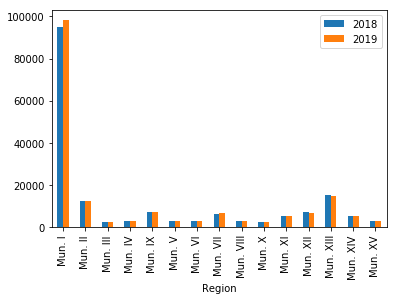

In [40]:
bothyears.plot.bar()

# Part 2 - Document Databases

In this part we will store the clean data in a database so that we can use it without the need to go through all these steps. We will use the [MongoDB](https://www.mongodb.com/what-is-mongodb) installed on our workstation and also through the Database-as-a-service provider [mLab](https://mlab.com/). 

The contents of the dataset will be stored into a document database where each row becomes a separate document. 

Documents are encoded as JSON objects.

We will use the [JSON encoder and decoder](https://docs.python.org/3/library/json.html) a standard python package as defined in [W3C School on JSON](https://www.w3schools.com/js/js_json_intro.asp). Two main methods are provided:
- *dumps* to write/convert/unmarsal a python object into a JSON object.
- *loads* to load/convert/marshal a JSON object into a Python Dictionary object.

In [41]:
import json

In [42]:
d = {'first_name':'Ioannis', 'positions': 'DIAG'}

In [43]:
d

{'first_name': 'Ioannis', 'positions': 'DIAG'}

In [44]:
json.dumps(d)

'{"first_name": "Ioannis", "positions": "DIAG"}'

In [45]:
txt = '{"first_name": "Ioannis", "positions": "DIAG", "nationality":"Greek" }'

In [46]:
dd = json.loads(txt)

In [47]:
dd

{'first_name': 'Ioannis', 'nationality': 'Greek', 'positions': 'DIAG'}

In [48]:
dd['positions'] = ['DIAG','Data Science']

In [49]:
json.dumps(dd)

'{"first_name": "Ioannis", "positions": ["DIAG", "Data Science"], "nationality": "Greek"}'

JSON supports multiple objects encoded as list of objects.

In [50]:
lst = [{'first_name': 'Ioannis', 'nationality': 'Greek', 'positions': ['DIAG','Data Science', 'BioInformatics']},
      {'first_name': 'Aris', 'nationality': 'Greek', 'positions': ['DIAG','Data Science']}]

In [51]:
json.dumps(lst)

'[{"first_name": "Ioannis", "nationality": "Greek", "positions": ["DIAG", "Data Science", "BioInformatics"]}, {"first_name": "Aris", "nationality": "Greek", "positions": ["DIAG", "Data Science"]}]'

PANDAS uses the [JSON encoder and decoder](https://docs.python.org/3/library/json.html) a standard python package as defined in [W3C School on JSON](https://www.w3schools.com/js/js_json_intro.asp). Two main methods are provided:
- *dumps* to write/convert/unmarsal a PANDAS object into a JSON object.
- *loads* to load/convert/marshal a JSON object into a Python Dictionary object.

Requesting a single object is straight forward:

In [52]:
pd.json.dumps(dataset2019.loc[0])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.json is deprecated and will be removed in a future version.
You can access dumps as pandas.io.json.dumps
  """Entry point for launching an IPython kernel.


'{"Insegna":"Casa e Appartamento per Vacanze \\"Trastevere_house\\"","Classificazione":"Categoria 2","Region":"Mun. XII","Type":"Casa Vacanze NON impr (Appartamento)","One-Bed-Rooms":1.0,"Two-Beds-Rooms":null,"Three-Beds-Rooms":null,"Four-Beds-Rooms":null,"Five-Beds-Rooms":null,"Total-Beds":1.0,"Address":"VIA FEDERICO ROSAZZA 52"}'

However for multiple objects, pandas is not using a list of dictionaries. Insted it is creating a dictionary of lists.

In [53]:
pd.json.dumps(dataset2019.loc[0:1])

'{"Insegna":{"0":"Casa e Appartamento per Vacanze \\"Trastevere_house\\"","1":"Casa e Appartamento per Vacanze \\"VIVES 63\\""},"Classificazione":{"0":"Categoria 2","1":"Categoria 1"},"Region":{"0":"Mun. XII","1":"Mun. XII"},"Type":{"0":"Casa Vacanze NON impr (Appartamento)","1":"Casa Vacanze NON impr (Appartamento)"},"One-Bed-Rooms":{"0":1.0,"1":null},"Two-Beds-Rooms":{"0":null,"1":1.0},"Three-Beds-Rooms":{"0":null,"1":null},"Four-Beds-Rooms":{"0":null,"1":null},"Five-Beds-Rooms":{"0":null,"1":null},"Total-Beds":{"0":1.0,"1":2.0},"Address":{"0":"VIA FEDERICO ROSAZZA 52","1":"VIA DI MONTE VERDE 63"}}'

So when we convert the JSON object back to a python object, we get a different ordering.

In [54]:
pd.json.loads(pd.json.dumps(dataset2019.loc[0:1]))

{'Address': {'0': 'VIA FEDERICO ROSAZZA 52', '1': 'VIA DI MONTE VERDE 63'},
 'Classificazione': {'0': 'Categoria 2', '1': 'Categoria 1'},
 'Five-Beds-Rooms': {'0': None, '1': None},
 'Four-Beds-Rooms': {'0': None, '1': None},
 'Insegna': {'0': 'Casa e Appartamento per Vacanze "Trastevere_house"',
  '1': 'Casa e Appartamento per Vacanze "VIVES 63"'},
 'One-Bed-Rooms': {'0': 1.0, '1': None},
 'Region': {'0': 'Mun. XII', '1': 'Mun. XII'},
 'Three-Beds-Rooms': {'0': None, '1': None},
 'Total-Beds': {'0': 1.0, '1': 2.0},
 'Two-Beds-Rooms': {'0': None, '1': 1.0},
 'Type': {'0': 'Casa Vacanze NON impr (Appartamento)',
  '1': 'Casa Vacanze NON impr (Appartamento)'}}

PANDAS provides the _to_json_ method that allows to choose a different orientation for the records. [Detailed examples are explained in the manual](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html).

In [55]:
dataset2019.loc[0:1].to_json(orient="records")

'[{"Insegna":"Casa e Appartamento per Vacanze \\"Trastevere_house\\"","Classificazione":"Categoria 2","Region":"Mun. XII","Type":"Casa Vacanze NON impr (Appartamento)","One-Bed-Rooms":1.0,"Two-Beds-Rooms":null,"Three-Beds-Rooms":null,"Four-Beds-Rooms":null,"Five-Beds-Rooms":null,"Total-Beds":1.0,"Address":"VIA FEDERICO ROSAZZA 52"},{"Insegna":"Casa e Appartamento per Vacanze \\"VIVES 63\\"","Classificazione":"Categoria 1","Region":"Mun. XII","Type":"Casa Vacanze NON impr (Appartamento)","One-Bed-Rooms":null,"Two-Beds-Rooms":1.0,"Three-Beds-Rooms":null,"Four-Beds-Rooms":null,"Five-Beds-Rooms":null,"Total-Beds":2.0,"Address":"VIA DI MONTE VERDE 63"}]'

Notice that the index is not included in the conversion. For example consider the grouped set:

In [56]:
region_set2019.to_json(orient="records")

'[{"One-Bed-Rooms":8560.0,"Two-Beds-Rooms":29234.0,"Three-Beds-Rooms":6535.0,"Four-Beds-Rooms":1679.0,"Five-Beds-Rooms":174.0,"Total-Beds":98098.0},{"One-Bed-Rooms":1459.0,"Two-Beds-Rooms":3801.0,"Three-Beds-Rooms":599.0,"Four-Beds-Rooms":133.0,"Five-Beds-Rooms":7.0,"Total-Beds":12464.0},{"One-Bed-Rooms":323.0,"Two-Beds-Rooms":691.0,"Three-Beds-Rooms":117.0,"Four-Beds-Rooms":17.0,"Five-Beds-Rooms":2.0,"Total-Beds":2385.0},{"One-Bed-Rooms":303.0,"Two-Beds-Rooms":646.0,"Three-Beds-Rooms":315.0,"Four-Beds-Rooms":19.0,"Five-Beds-Rooms":5.0,"Total-Beds":2853.0},{"One-Bed-Rooms":298.0,"Two-Beds-Rooms":2722.0,"Three-Beds-Rooms":291.0,"Four-Beds-Rooms":41.0,"Five-Beds-Rooms":2.0,"Total-Beds":7241.0},{"One-Bed-Rooms":270.0,"Two-Beds-Rooms":1070.0,"Three-Beds-Rooms":114.0,"Four-Beds-Rooms":33.0,"Five-Beds-Rooms":0.0,"Total-Beds":3235.0},{"One-Bed-Rooms":200.0,"Two-Beds-Rooms":926.0,"Three-Beds-Rooms":115.0,"Four-Beds-Rooms":76.0,"Five-Beds-Rooms":0.0,"Total-Beds":2894.0},{"One-Bed-Rooms":687.0,"

We need to be careful when using pandas to convert a dataframe into a JSON object. The representation of our data into a document depends on the actual tasks we need to carry out. The structure of the documents usually affect the performance of our code.

One way to include the index in the JSON object is to change the index of the DataFrame as follows:

In [57]:
json_set2019 = region_set2019.reset_index(level=0)

In [58]:
json_set2019

,Region,One-Bed-Rooms,Two-Beds-Rooms,Three-Beds-Rooms,Four-Beds-Rooms,Five-Beds-Rooms,Total-Beds
0,Mun. I,8560.0,29234.0,6535.0,1679.0,174.0,98098.0
1,Mun. II,1459.0,3801.0,599.0,133.0,7.0,12464.0
2,Mun. III,323.0,691.0,117.0,17.0,2.0,2385.0
3,Mun. IV,303.0,646.0,315.0,19.0,5.0,2853.0
4,Mun. IX,298.0,2722.0,291.0,41.0,2.0,7241.0
5,Mun. V,270.0,1070.0,114.0,33.0,0.0,3235.0
6,Mun. VI,200.0,926.0,115.0,76.0,0.0,2894.0
7,Mun. VII,687.0,2178.0,301.0,33.0,1.0,6665.0
8,Mun. VIII,258.0,1056.0,175.0,28.0,0.0,3203.0
9,Mun. X,339.0,671.0,40.0,21.0,0.0,2606.0


In [59]:
json_set2019.to_json(orient='records')

'[{"Region":"Mun. I","One-Bed-Rooms":8560.0,"Two-Beds-Rooms":29234.0,"Three-Beds-Rooms":6535.0,"Four-Beds-Rooms":1679.0,"Five-Beds-Rooms":174.0,"Total-Beds":98098.0},{"Region":"Mun. II","One-Bed-Rooms":1459.0,"Two-Beds-Rooms":3801.0,"Three-Beds-Rooms":599.0,"Four-Beds-Rooms":133.0,"Five-Beds-Rooms":7.0,"Total-Beds":12464.0},{"Region":"Mun. III","One-Bed-Rooms":323.0,"Two-Beds-Rooms":691.0,"Three-Beds-Rooms":117.0,"Four-Beds-Rooms":17.0,"Five-Beds-Rooms":2.0,"Total-Beds":2385.0},{"Region":"Mun. IV","One-Bed-Rooms":303.0,"Two-Beds-Rooms":646.0,"Three-Beds-Rooms":315.0,"Four-Beds-Rooms":19.0,"Five-Beds-Rooms":5.0,"Total-Beds":2853.0},{"Region":"Mun. IX","One-Bed-Rooms":298.0,"Two-Beds-Rooms":2722.0,"Three-Beds-Rooms":291.0,"Four-Beds-Rooms":41.0,"Five-Beds-Rooms":2.0,"Total-Beds":7241.0},{"Region":"Mun. V","One-Bed-Rooms":270.0,"Two-Beds-Rooms":1070.0,"Three-Beds-Rooms":114.0,"Four-Beds-Rooms":33.0,"Five-Beds-Rooms":0.0,"Total-Beds":3235.0},{"Region":"Mun. VI","One-Bed-Rooms":200.0,"Two-B

In [60]:
str = json_set2019.to_json(orient='records')

Let's examine the reverse path, that is, from the JSON object back to a DataFrame.

In [61]:
dict = pd.json.loads(str)

In [62]:
dict

[{'Five-Beds-Rooms': 174.0,
  'Four-Beds-Rooms': 1679.0,
  'One-Bed-Rooms': 8560.0,
  'Region': 'Mun. I',
  'Three-Beds-Rooms': 6535.0,
  'Total-Beds': 98098.0,
  'Two-Beds-Rooms': 29234.0},
 {'Five-Beds-Rooms': 7.0,
  'Four-Beds-Rooms': 133.0,
  'One-Bed-Rooms': 1459.0,
  'Region': 'Mun. II',
  'Three-Beds-Rooms': 599.0,
  'Total-Beds': 12464.0,
  'Two-Beds-Rooms': 3801.0},
 {'Five-Beds-Rooms': 2.0,
  'Four-Beds-Rooms': 17.0,
  'One-Bed-Rooms': 323.0,
  'Region': 'Mun. III',
  'Three-Beds-Rooms': 117.0,
  'Total-Beds': 2385.0,
  'Two-Beds-Rooms': 691.0},
 {'Five-Beds-Rooms': 5.0,
  'Four-Beds-Rooms': 19.0,
  'One-Bed-Rooms': 303.0,
  'Region': 'Mun. IV',
  'Three-Beds-Rooms': 315.0,
  'Total-Beds': 2853.0,
  'Two-Beds-Rooms': 646.0},
 {'Five-Beds-Rooms': 2.0,
  'Four-Beds-Rooms': 41.0,
  'One-Bed-Rooms': 298.0,
  'Region': 'Mun. IX',
  'Three-Beds-Rooms': 291.0,
  'Total-Beds': 7241.0,
  'Two-Beds-Rooms': 2722.0},
 {'Five-Beds-Rooms': 0.0,
  'Four-Beds-Rooms': 33.0,
  'One-Bed-Rooms':

In [63]:
pd.DataFrame(dict)

,Five-Beds-Rooms,Four-Beds-Rooms,One-Bed-Rooms,Region,Three-Beds-Rooms,Total-Beds,Two-Beds-Rooms
0,174.0,1679.0,8560.0,Mun. I,6535.0,98098.0,29234.0
1,7.0,133.0,1459.0,Mun. II,599.0,12464.0,3801.0
2,2.0,17.0,323.0,Mun. III,117.0,2385.0,691.0
3,5.0,19.0,303.0,Mun. IV,315.0,2853.0,646.0
4,2.0,41.0,298.0,Mun. IX,291.0,7241.0,2722.0
5,0.0,33.0,270.0,Mun. V,114.0,3235.0,1070.0
6,0.0,76.0,200.0,Mun. VI,115.0,2894.0,926.0
7,1.0,33.0,687.0,Mun. VII,301.0,6665.0,2178.0
8,0.0,28.0,258.0,Mun. VIII,175.0,3203.0,1056.0
9,0.0,21.0,339.0,Mun. X,40.0,2606.0,671.0


In [64]:
pd.DataFrame(dict).set_index(keys='Region')

,Five-Beds-Rooms,Four-Beds-Rooms,One-Bed-Rooms,Three-Beds-Rooms,Total-Beds,Two-Beds-Rooms
Region,,,,,,
Mun. I,174.0,1679.0,8560.0,6535.0,98098.0,29234.0
Mun. II,7.0,133.0,1459.0,599.0,12464.0,3801.0
Mun. III,2.0,17.0,323.0,117.0,2385.0,691.0
Mun. IV,5.0,19.0,303.0,315.0,2853.0,646.0
Mun. IX,2.0,41.0,298.0,291.0,7241.0,2722.0
Mun. V,0.0,33.0,270.0,114.0,3235.0,1070.0
Mun. VI,0.0,76.0,200.0,115.0,2894.0,926.0
Mun. VII,1.0,33.0,687.0,301.0,6665.0,2178.0
Mun. VIII,0.0,28.0,258.0,175.0,3203.0,1056.0


## Local Mongo

We will use the pymongo library to interact with MongoDB.

In [65]:
from pymongo import MongoClient

First we need to establish a connection with the MongoDB server available on our local machine.

In [66]:
client = MongoClient('localhost', 27017)

The second step is to create a new Database. pymongo is offering a very easy approach to create a new database. The interface is similar to that of the dictionary data type, where we use the name of the database similar to the way we use the key of an entry in the dictionary data type.

In [67]:
db = client["Hotels"]

Notice that the database is not created yet. The actual operation is anticipated until the actual moment when it is absolutely necessary to take place.

In [68]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Hotels')

A database is capable of holding one or more collections. We can create collections by introducing a name.

In [69]:
collection = db.Regions

Again, the operation of creating a collection is delayed until the very last moment that is needed.

In [70]:
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Hotels'), 'Regions')

Now that the collection is ready, we can insert our data.

The method _insert_many_ is expecting a Dictionary like the one we created above under the **dict** variable.

In [71]:
collection.insert_many(dict)

The _find_ method is used to access the entries of a collection

In [72]:
entries = collection.find()

In [73]:
for item in entries:
    print(item)

{'_id': ObjectId('5d9cdaa295f9546674a26f02'), 'Region': 'Mun. I', 'One-Bed-Rooms': 8560.0, 'Two-Beds-Rooms': 29234.0, 'Three-Beds-Rooms': 6535.0, 'Four-Beds-Rooms': 1679.0, 'Five-Beds-Rooms': 174.0, 'Total-Beds': 98098.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f03'), 'Region': 'Mun. II', 'One-Bed-Rooms': 1459.0, 'Two-Beds-Rooms': 3801.0, 'Three-Beds-Rooms': 599.0, 'Four-Beds-Rooms': 133.0, 'Five-Beds-Rooms': 7.0, 'Total-Beds': 12464.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f04'), 'Region': 'Mun. III', 'One-Bed-Rooms': 323.0, 'Two-Beds-Rooms': 691.0, 'Three-Beds-Rooms': 117.0, 'Four-Beds-Rooms': 17.0, 'Five-Beds-Rooms': 2.0, 'Total-Beds': 2385.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f05'), 'Region': 'Mun. IV', 'One-Bed-Rooms': 303.0, 'Two-Beds-Rooms': 646.0, 'Three-Beds-Rooms': 315.0, 'Four-Beds-Rooms': 19.0, 'Five-Beds-Rooms': 5.0, 'Total-Beds': 2853.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f06'), 'Region': 'Mun. IX', 'One-Bed-Rooms': 298.0, 'Two-Beds-Rooms': 2722.0, 'Three-Beds-Ro

MongoDB provides a special syntax in order to narrow down the items retuned by the **find** method.

In [74]:
for item in collection.find({ "$or": [{"Region" : "Mun. I"}, {"Region" : "Mun. II"}] }):
    print(item)

{'_id': ObjectId('5d9cdaa295f9546674a26f02'), 'Region': 'Mun. I', 'One-Bed-Rooms': 8560.0, 'Two-Beds-Rooms': 29234.0, 'Three-Beds-Rooms': 6535.0, 'Four-Beds-Rooms': 1679.0, 'Five-Beds-Rooms': 174.0, 'Total-Beds': 98098.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f03'), 'Region': 'Mun. II', 'One-Bed-Rooms': 1459.0, 'Two-Beds-Rooms': 3801.0, 'Three-Beds-Rooms': 599.0, 'Four-Beds-Rooms': 133.0, 'Five-Beds-Rooms': 7.0, 'Total-Beds': 12464.0}


The results of the **find** method can be easily converted into a DataFrame.

In [75]:
new_region_2019 = pd.DataFrame(list(collection.find({ "$or": [{"Region" : "Mun. I"}, {"Region" : "Mun. II"}] })))

In [76]:
new_region_2019

,Five-Beds-Rooms,Four-Beds-Rooms,One-Bed-Rooms,Region,Three-Beds-Rooms,Total-Beds,Two-Beds-Rooms,_id
0,174.0,1679.0,8560.0,Mun. I,6535.0,98098.0,29234.0,5d9cdaa295f9546674a26f02
1,7.0,133.0,1459.0,Mun. II,599.0,12464.0,3801.0,5d9cdaa295f9546674a26f03


In [77]:
new_region_2019.drop(columns='_id', inplace=True)

In [78]:
new_region_2019

,Five-Beds-Rooms,Four-Beds-Rooms,One-Bed-Rooms,Region,Three-Beds-Rooms,Total-Beds,Two-Beds-Rooms
0,174.0,1679.0,8560.0,Mun. I,6535.0,98098.0,29234.0
1,7.0,133.0,1459.0,Mun. II,599.0,12464.0,3801.0


In [79]:
new_region_2019.set_index(keys='Region', inplace=True)

In [80]:
new_region_2019

,Five-Beds-Rooms,Four-Beds-Rooms,One-Bed-Rooms,Three-Beds-Rooms,Total-Beds,Two-Beds-Rooms
Region,,,,,,
Mun. I,174.0,1679.0,8560.0,6535.0,98098.0,29234.0
Mun. II,7.0,133.0,1459.0,599.0,12464.0,3801.0


The same query syntax is used to delete records.

In [81]:
collection.delete_many({ "$or": [{"Region" : "Mun. I"}, {"Region" : "Mun. II"}] })

In [82]:
for item in collection.find():
    print(item)

{'_id': ObjectId('5d9cdaa295f9546674a26f04'), 'Region': 'Mun. III', 'One-Bed-Rooms': 323.0, 'Two-Beds-Rooms': 691.0, 'Three-Beds-Rooms': 117.0, 'Four-Beds-Rooms': 17.0, 'Five-Beds-Rooms': 2.0, 'Total-Beds': 2385.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f05'), 'Region': 'Mun. IV', 'One-Bed-Rooms': 303.0, 'Two-Beds-Rooms': 646.0, 'Three-Beds-Rooms': 315.0, 'Four-Beds-Rooms': 19.0, 'Five-Beds-Rooms': 5.0, 'Total-Beds': 2853.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f06'), 'Region': 'Mun. IX', 'One-Bed-Rooms': 298.0, 'Two-Beds-Rooms': 2722.0, 'Three-Beds-Rooms': 291.0, 'Four-Beds-Rooms': 41.0, 'Five-Beds-Rooms': 2.0, 'Total-Beds': 7241.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f07'), 'Region': 'Mun. V', 'One-Bed-Rooms': 270.0, 'Two-Beds-Rooms': 1070.0, 'Three-Beds-Rooms': 114.0, 'Four-Beds-Rooms': 33.0, 'Five-Beds-Rooms': 0.0, 'Total-Beds': 3235.0}
{'_id': ObjectId('5d9cdaa295f9546674a26f08'), 'Region': 'Mun. VI', 'One-Bed-Rooms': 200.0, 'Two-Beds-Rooms': 926.0, 'Three-Beds-Rooms': 115.0,

The same syntax is used to update the records within the collection. An update can also introduce new keys.

In [83]:
myquery = {"Region" : "Mun. XV"}
newvalues = { "$set": { 'One-BXV-Rooms': 4000, 'One-Bed-Rooms': 339.0 } }

collection.update_one(myquery, newvalues)

In [84]:
list(collection.find({"Region" : "Mun. XV"}))

[{'Five-Beds-Rooms': 1.0,
  'Four-Beds-Rooms': 35.0,
  'One-BXV-Rooms': 4000,
  'One-Bed-Rooms': 339.0,
  'Region': 'Mun. XV',
  'Three-Beds-Rooms': 168.0,
  'Total-Beds': 3011.0,
  'Two-Beds-Rooms': 879.0,
  '_id': ObjectId('5d9cdaa295f9546674a26f10')}]

We can also drop all the collection in one step.

In [85]:
collection.drop()

## Database-as-a-Service: mLAB

We now wish to store the contents of the dataset into a document database where each row becomes a separate document. We will use the [MongoDB](https://www.mongodb.com/what-is-mongodb) and the Database-as-a-service provider [mLab](https://mlab.com/).

Using the web interface provided by mLab create a new account under mLab.

Now we need to create a new Database through the [mLab web UI wizard](https://mlab.com/create/wizard). 

1. Choose the SANDBOX plan type, which is free for storing up to 500MB of data and click on the button *Continue*.
2. Choose the Region where the new database will be located (e.g., Europe) and click on the button *Continue*.
3. Give a name to the database name (e.g., *adm2019*) and click on the button *Continue*.
4. The final page displays the details of the new database. Click *Submit Order* to create the new database.

Select the new database. Within the new page you will get a help window on the connection string of the new database.

Go to **user tab** and create a new user.

In [86]:
connection = MongoClient("ds331758.mlab.com", 31758)
db = connection["adm2019"]
db.authenticate("dbuser", "pass123")

True

In [87]:
coll2018 = db.Regions2018

In [88]:
json_set2018 = region_set2018.reset_index(level=0)

In [89]:
str2018 = json_set2018.to_json(orient='records')

In [90]:
dict2018 = json.loads(str2018)

In [91]:
coll2018.insert_many(dict2018)

The rest of the operations are exaclty the same.